In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sansuthi/dry-bean-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/snuffells_linux/.cache/kagglehub/datasets/sansuthi/dry-bean-dataset/versions/1


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(path+'/Dry_Bean.csv')

In [4]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [5]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
df_desc = df.describe() 
df_desc.loc['median'] = df.median(numeric_only=True)
df_desc.loc['IQR'] = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)
df_desc


Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count    13611.000000  13611.000000     13611.000000     13611.000000   
mean     53048.284549    855.283459       320.141867       202.270714   
std      29324.095717    214.289696        85.694186        44.970091   
min      20420.000000    524.736000       183.601165       122.512653   
25%      36328.000000    703.523500       253.303633       175.848170   
50%      44652.000000    794.941000       296.883367       192.431733   
75%      61332.000000    977.213000       376.495012       217.031741   
max     254616.000000   1985.370000       738.860154       460.198497   
median   44652.000000    794.941000       296.883367       192.431733   
IQR      25004.000000    273.689500       123.191380        41.183571   

        AspectRation  Eccentricity     ConvexArea  EquivDiameter  \
count   13611.000000  13611.000000   13611.000000   13611.000000   
mean        1.583242      0.750895   53768.200206     253.064220   
std         0.246678      0.092002   29774.915817      59.177120   
min         1.024868      0.218951   20684.000000     161.243764   
25%         1.432307      0.715928   36714.500000     215.068003   
50%         1.551124      0.764441   45178.000000     238.438026   
75%         1.707109      0.810466   62294.000000     279.446467   
max         2.430306      0.911423  263261.000000     569.374358   
median      1.551124      0.764441   45178.000000     238.438026   
IQR         0.274802      0.094538   25579.500000      64.378463   

              Extent      Solidity     roundness   Compactness  ShapeFactor1  \
count   13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean        0.749733      0.987143      0.873282      0.799864      0.006564   
std         0.049086      0.004660      0.059520      0.061713      0.001128   
min         0.555315      0.919246      0.489618      0.640577      0.002778   
25%         0.718634      0.985670      0.832096      0.762469      0.005900   
50%         0.759859      0.988283      0.883157      0.801277      0.006645   
75%         0.786851      0.990013      0.916869      0.834270      0.007271   
max         0.866195      0.994677      0.990685      0.987303      0.010451   
median      0.759859      0.988283      0.883157      0.801277      0.006645   
IQR         0.068218      0.004343      0.084773      0.071801      0.001372   

        ShapeFactor2  ShapeFactor3  ShapeFactor4  
count   13611.000000  13611.000000  13611.000000  
mean        0.001716      0.643590      0.995063  
std         0.000596      0.098996      0.004366  
min         0.000564      0.410339      0.947687  
25%         0.001154      0.581359      0.993703  
50%         0.001694      0.642044      0.996386  
75%         0.002170      0.696006      0.997883  
max         0.003665      0.974767      0.999733  
median      0.001694      0.642044      0.996386  
IQR         0.001017      0.114648      0.004180

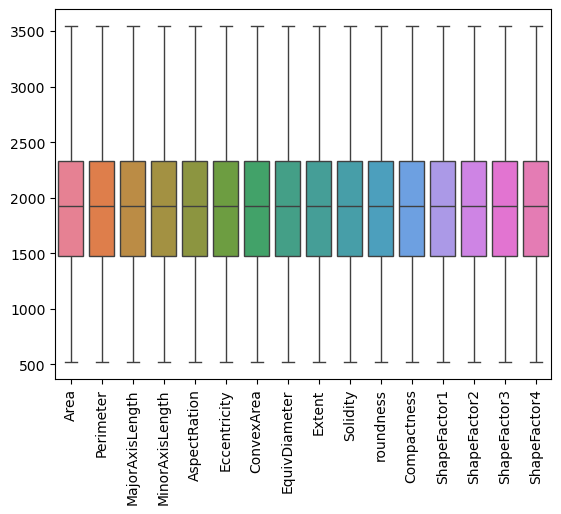

In [7]:
sns.boxplot(df.groupby(by='Class').count() )
plt.xticks(rotation=90)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
df.groupby(by= 'Class').count()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
Class                                                                       
BARBUNYA  1322       1322             1322             1322          1322   
BOMBAY     522        522              522              522           522   
CALI      1630       1630             1630             1630          1630   
DERMASON  3546       3546             3546             3546          3546   
HOROZ     1860       1860             1860             1860          1860   
SEKER     2027       2027             2027             2027          2027   
SIRA      2636       2636             2636             2636          2636   

          Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  \
Class                                                                 
BARBUNYA          1322        1322           1322    1322      1322   
BOMBAY             522         522            522     522       522   
CALI              1630        1630           1630    1630      1630   
DERMASON          3546        3546           3546    3546      3546   
HOROZ             1860        1860           1860    1860      1860   
SEKER             2027        2027           2027    2027      2027   
SIRA              2636        2636           2636    2636      2636   

          roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
Class                                                                        
BARBUNYA       1322         1322          1322          1322          1322   
BOMBAY          522          522           522           522           522   
CALI           1630         1630          1630          1630          1630   
DERMASON       3546         3546          3546          3546          3546   
HOROZ          1860         1860          1860          1860          1860   
SEKER          2027         2027          2027          2027          2027   
SIRA           2636         2636          2636          2636          2636   

          ShapeFactor4  
Class                   
BARBUNYA          1322  
BOMBAY             522  
CALI              1630  
DERMASON          3546  
HOROZ             1860  
SEKER             2027  
SIRA              2636

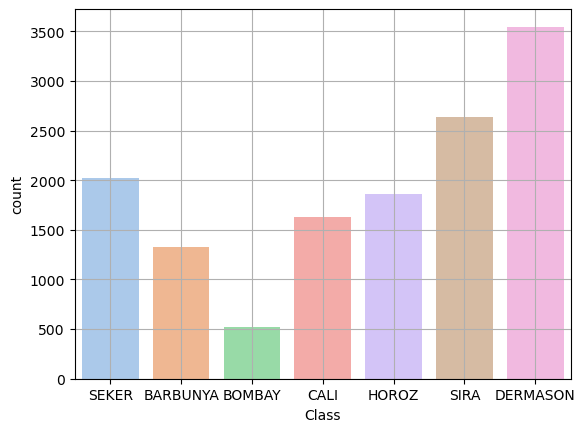

In [12]:
sns.countplot(df, x = 'Class', palette='pastel', hue='Class')
plt.grid()
plt.show()

In [13]:
from imblearn.under_sampling import RandomUnderSampler
underSumple = RandomUnderSampler(random_state=42)

In [14]:
X = df.drop(['Class'], axis= 1)
Y = df.Class


In [15]:
X_over, Y_over = underSumple.fit_resample(X,Y)

/tmp/ipykernel_67812/2174640184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = Y_over ,palette='pastel')


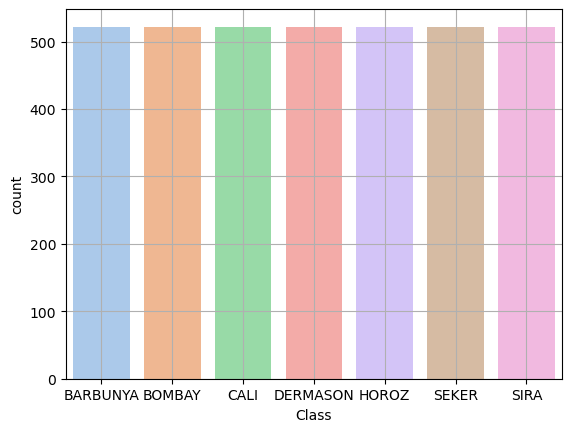

In [16]:
sns.countplot(x = Y_over ,palette='pastel')
plt.grid()
plt.show()

In [17]:
vars = Y_over.unique()
Y_over.replace(vars, range(1,8), inplace=True)
Y_over.unique()

/tmp/ipykernel_67812/3239997183.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_over.replace(vars, range(1,8), inplace=True)


array([1, 2, 3, 4, 5, 6, 7])

In [18]:
df_us = X_over
df_us['Class'] = Y_over

In [19]:
df_corr = df_us.corr()
df_corr[abs(df_corr)>0.5]


Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.978870         0.958334         0.974395   
Perimeter        0.978870   1.000000         0.985134         0.952388   
MajorAxisLength  0.958334   0.985134         1.000000         0.900103   
MinorAxisLength  0.974395   0.952388         0.900103         1.000000   
AspectRation          NaN        NaN              NaN              NaN   
Eccentricity          NaN        NaN              NaN              NaN   
ConvexArea       0.999949   0.979531         0.958927         0.974145   
EquivDiameter    0.991308   0.994230         0.975639         0.973592   
Extent                NaN        NaN              NaN              NaN   
Solidity              NaN        NaN              NaN              NaN   
roundness             NaN        NaN              NaN              NaN   
Compactness           NaN        NaN              NaN              NaN   
ShapeFactor1    -0.900388  -0.915605        -0.855088        -0.960078   
ShapeFactor2    -0.660412  -0.763889        -0.834996        -0.556940   
ShapeFactor3          NaN        NaN              NaN              NaN   
ShapeFactor4          NaN        NaN              NaN              NaN   
Class           -0.566347  -0.630055        -0.584255        -0.583856   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                      NaN           NaN    0.999949       0.991308   
Perimeter                 NaN           NaN    0.979531       0.994230   
MajorAxisLength           NaN           NaN    0.958927       0.975639   
MinorAxisLength           NaN           NaN    0.974145       0.973592   
AspectRation         1.000000      0.926158         NaN            NaN   
Eccentricity         0.926158      1.000000         NaN            NaN   
ConvexArea                NaN           NaN    1.000000       0.991449   
EquivDiameter             NaN           NaN    0.991449       1.000000   
Extent                    NaN           NaN         NaN            NaN   
Solidity                  NaN           NaN         NaN            NaN   
roundness           -0.725070     -0.705914         NaN            NaN   
Compactness         -0.987622     -0.971430         NaN            NaN   
ShapeFactor1              NaN           NaN   -0.900425      -0.929899   
ShapeFactor2        -0.757632     -0.826584   -0.661770      -0.718441   
ShapeFactor3        -0.978656     -0.981848         NaN            NaN   
ShapeFactor4              NaN           NaN         NaN            NaN   
Class                     NaN           NaN   -0.568049      -0.601721   

                 Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area                NaN       NaN        NaN          NaN     -0.900388   
Perimeter           NaN       NaN        NaN          NaN     -0.915605   
MajorAxisLength     NaN       NaN        NaN          NaN     -0.855088   
MinorAxisLength     NaN       NaN        NaN          NaN     -0.960078   
AspectRation        NaN       NaN  -0.725070    -0.987622           NaN   
Eccentricity        NaN       NaN  -0.705914    -0.971430           NaN   
ConvexArea          NaN       NaN        NaN          NaN     -0.900425   
EquivDiameter       NaN       NaN        NaN          NaN     -0.929899   
Extent              1.0       NaN        NaN          NaN           NaN   
Solidity            NaN  1.000000   0.604308          NaN           NaN   
roundness           NaN  0.604308   1.000000     0.734032           NaN   
Compactness         NaN       NaN   0.734032     1.000000           NaN   
ShapeFactor1        NaN       NaN        NaN          NaN      1.000000   
ShapeFactor2        NaN       NaN   0.703571     0.806311      0.553803   
ShapeFactor3        NaN       NaN   0.732271     0.998715           NaN   
ShapeFactor4        NaN  0.705658        NaN          NaN           NaN   
Class               NaN       NaN        NaN          NaN      0.595998   

    

<Axes: >

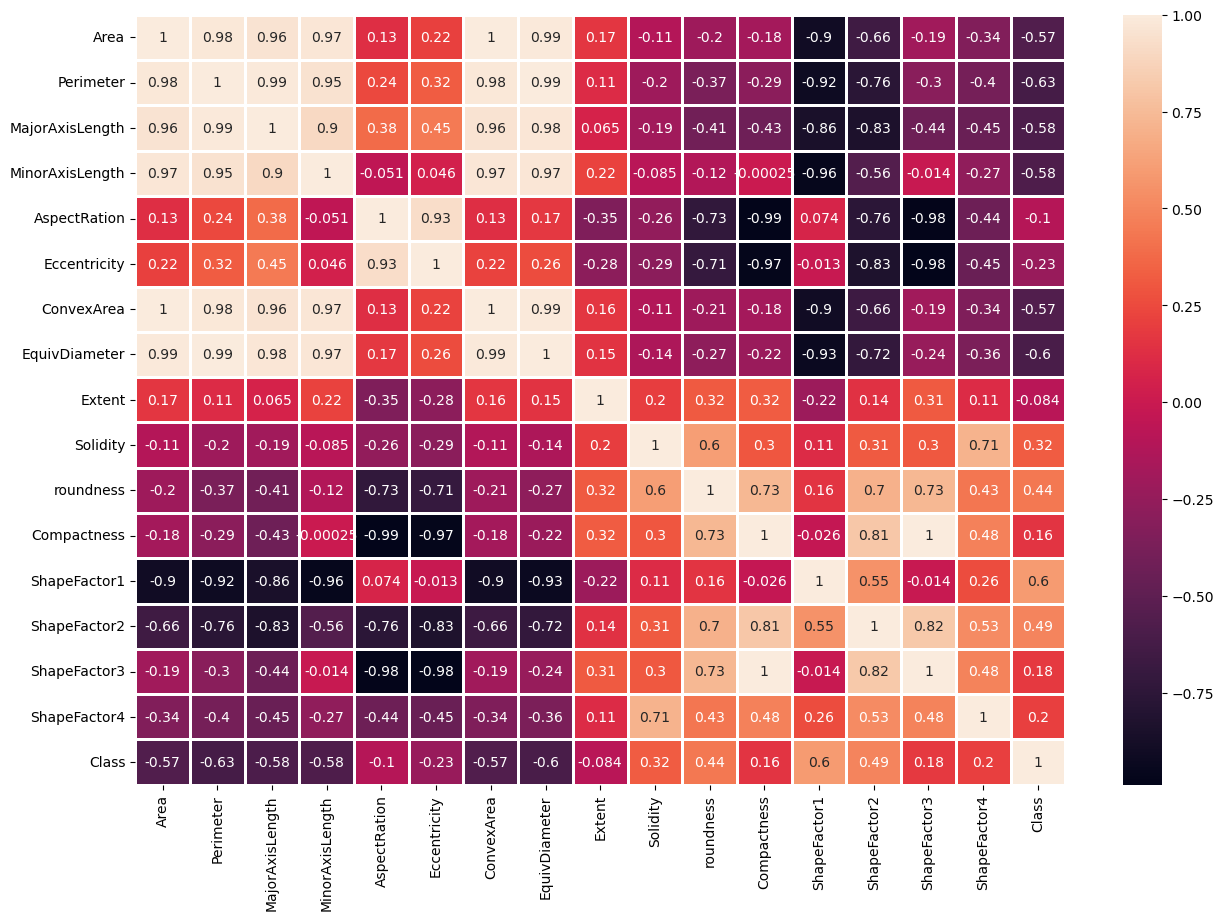

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True,linewidths=1)

In [21]:
X_over.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [22]:
X_over.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

In [23]:
df_us = X_over
df_us['Class'] = Y_over

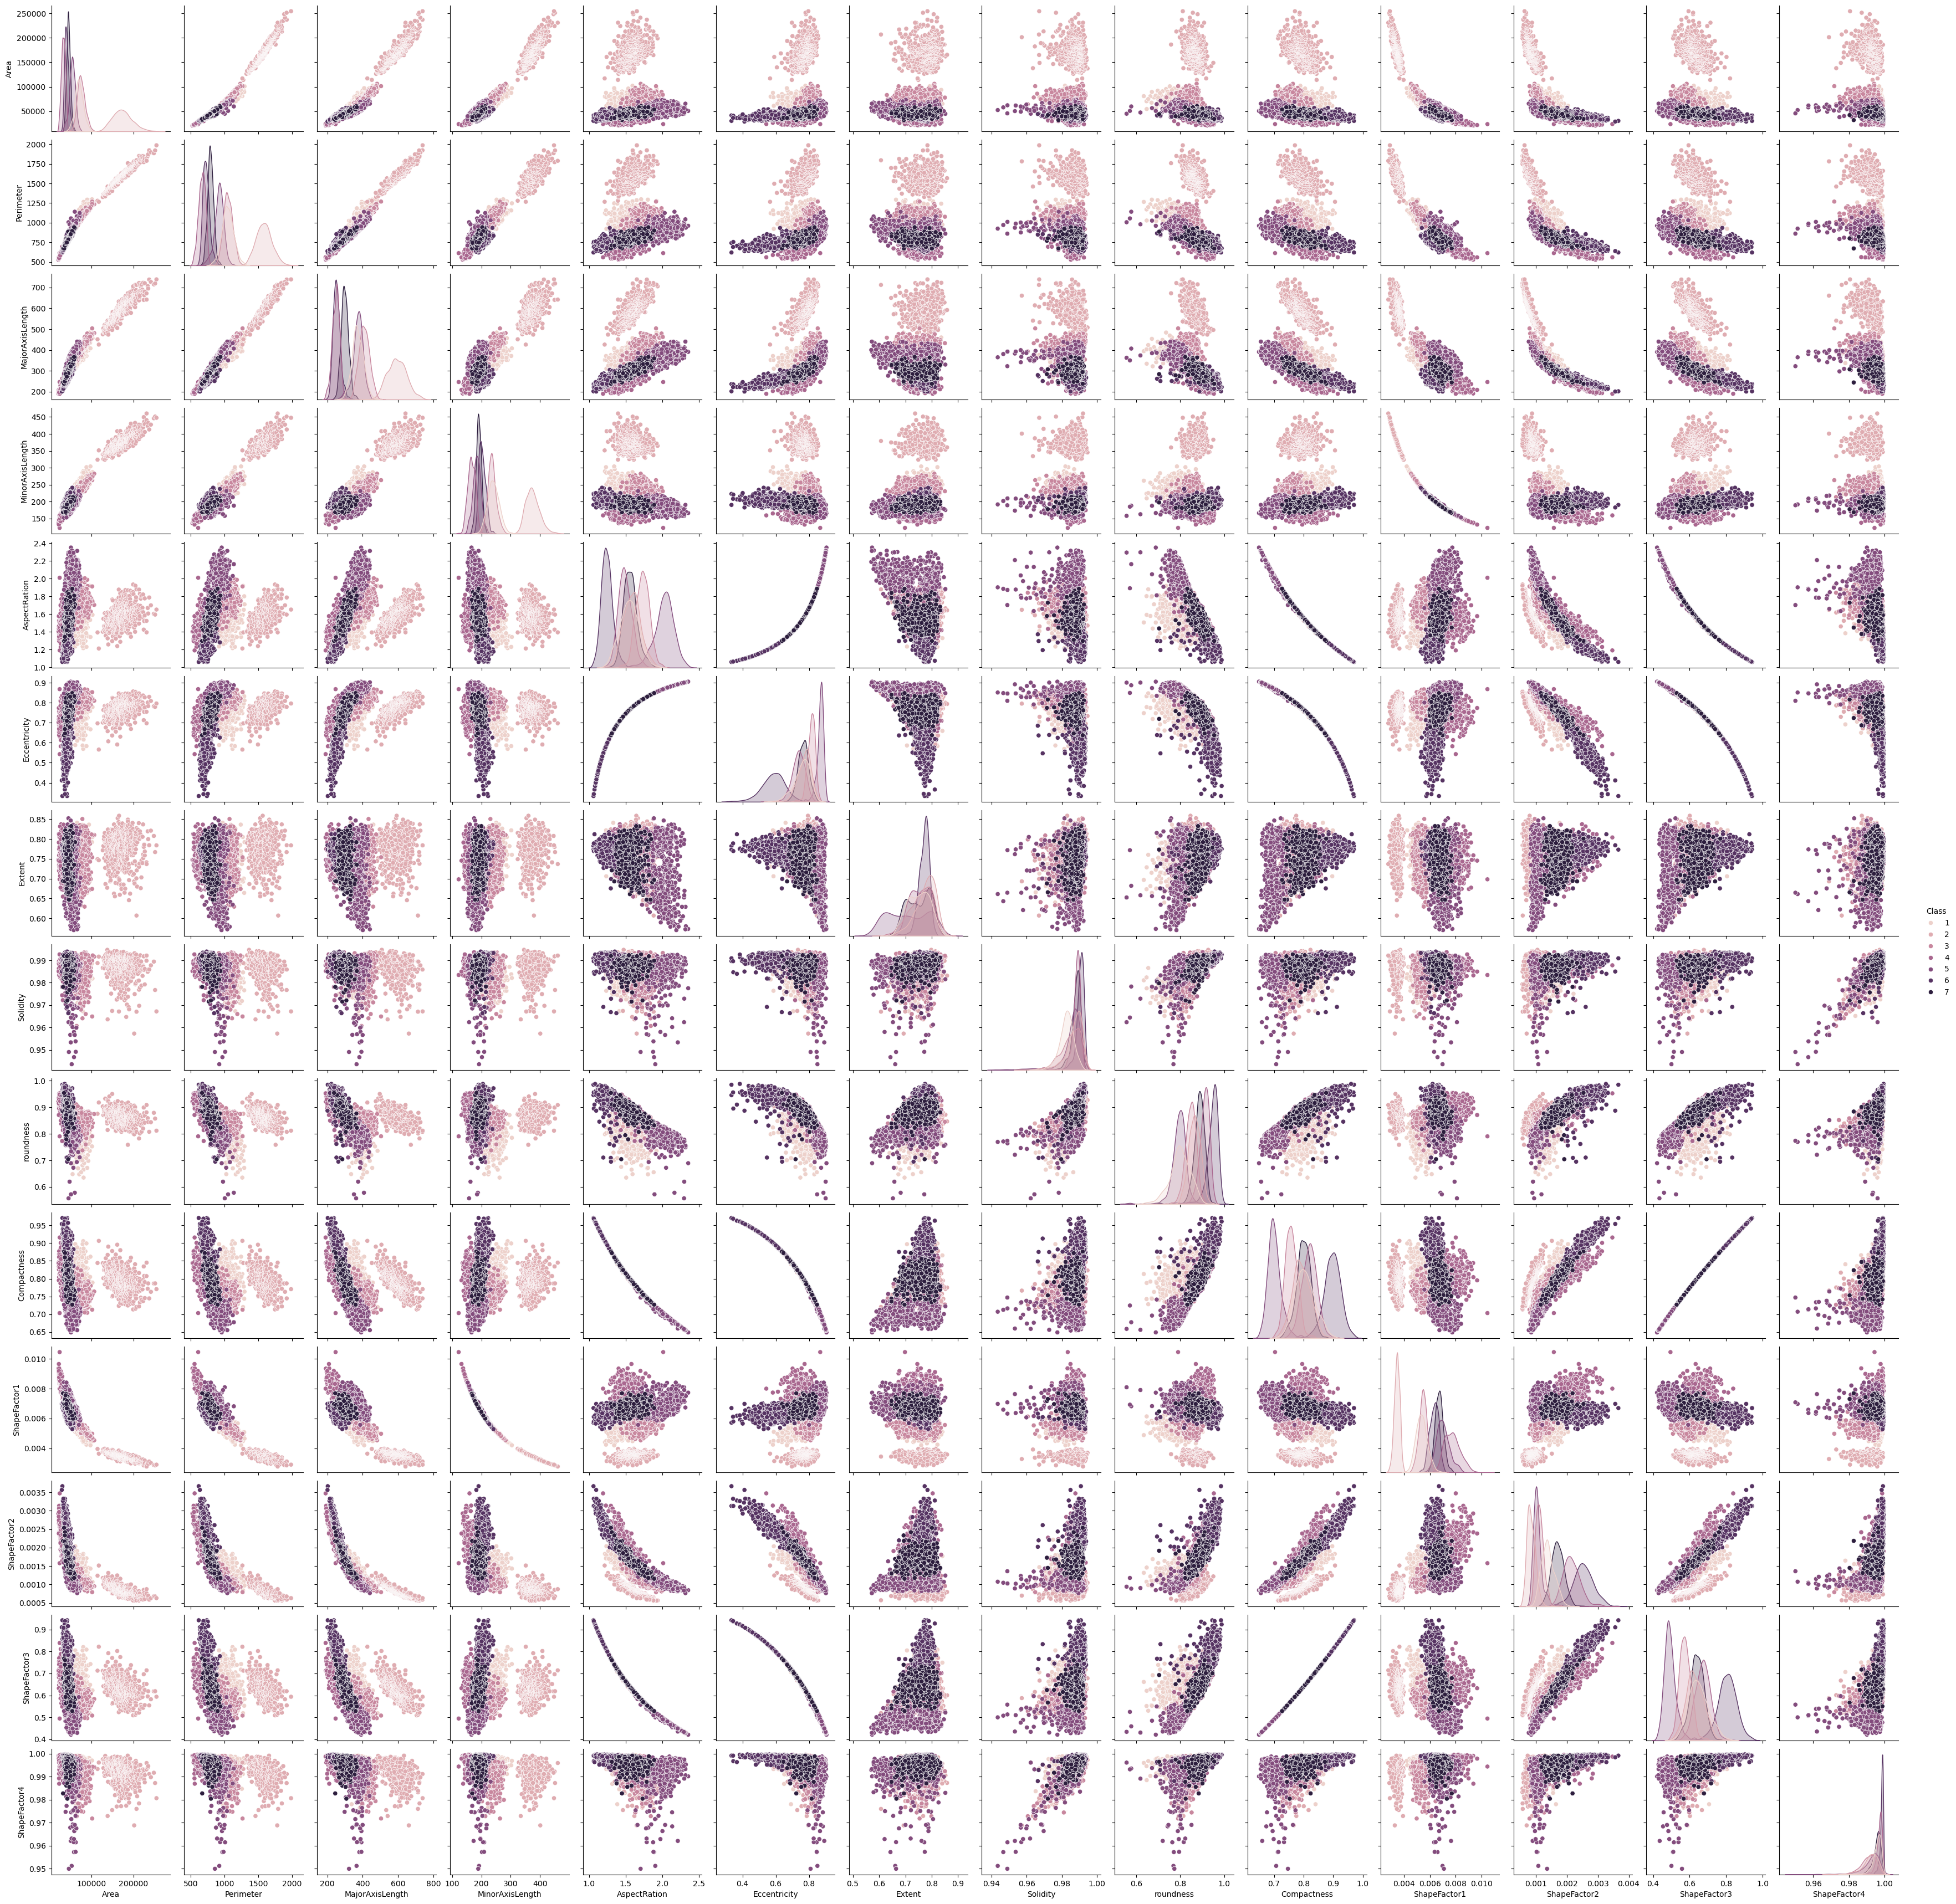

In [24]:
sns.pairplot(df_us, hue='Class')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_trian, x_test, y_train, y_test = train_test_split(X_over,Y_over, test_size=0.2, random_state=42)

In [27]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [28]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler_x = StandardScaler()


In [39]:
x_train_stan = scaler_x.fit_transform(x_trian)
x_test_stan = scaler_x.fit_transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
def log_regre(C,solver, multiclass):
    model = LogisticRegression(random_state=42, solver=solver , multi_class=multiclass, n_jobs=-1, C=C)
    return model

In [33]:
model = log_regre(1, 'saga', 'multinomial')

In [ ]:
df_us = X_over
df_us['Class'] = Y_over

In [37]:
y_train

array([[6],
       [6],
       [5],
       ...,
       [2],
       [7],
       [7]])

In [40]:
model.fit(x_train_stan, y_train)

/home/snuffells_linux/miniforge3/envs/general_purpose/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/snuffells_linux/miniforge3/envs/general_purpose/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/snuffells_linux/miniforge3/envs/general_purpose/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='saga')

In [58]:
y_pred = model.predict(x_test_stan)
print(y_pred[:10])
print(y_test[:10].reshape(1,-1))

[3 4 1 7 5 2 2 7 2 6]
[[3 4 1 7 5 2 2 6 2 6]]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


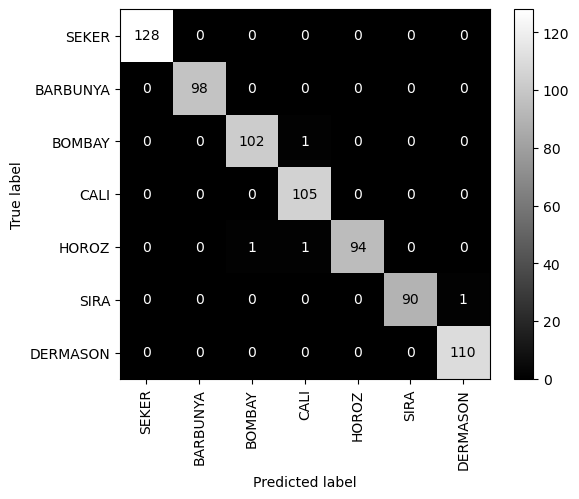

In [71]:
disp = ConfusionMatrixDisplay(cm, display_labels=df['Class'].unique())
disp.plot(cmap='grey',xticks_rotation='vertical')